C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.4143 - mae: 1.8781 - val_loss: 2.3994 - val_mae: 1.2320
Epoch 2/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1.9772 - mae: 1.0577 - val_loss: 0.8818 - val_mae: 0.6373
Epoch 3/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.7902 - mae: 0.6073 - val_loss: 0.6035 - val_mae: 0.5696
Epoch 4/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.8665 - mae: 0.5653 - val_loss: 0.5517 - val_mae: 0.5445
Epoch 5/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.9949 - mae: 0.5452 - val_loss: 0.5327 - val_mae: 0.5254
Epoch 6/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.0459 - mae: 0.5324 - val_loss: 0.5286 - val_mae: 0.5185
Epoch 7/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.6794 - mae: 0.5284 - val_loss: 0.5294 - val_mae: 0.5148
Epoch 8/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1.6459 - mae: 0.5299 - val_loss: 0.5335 - val_mae: 0.5125
Epoch 9/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step 

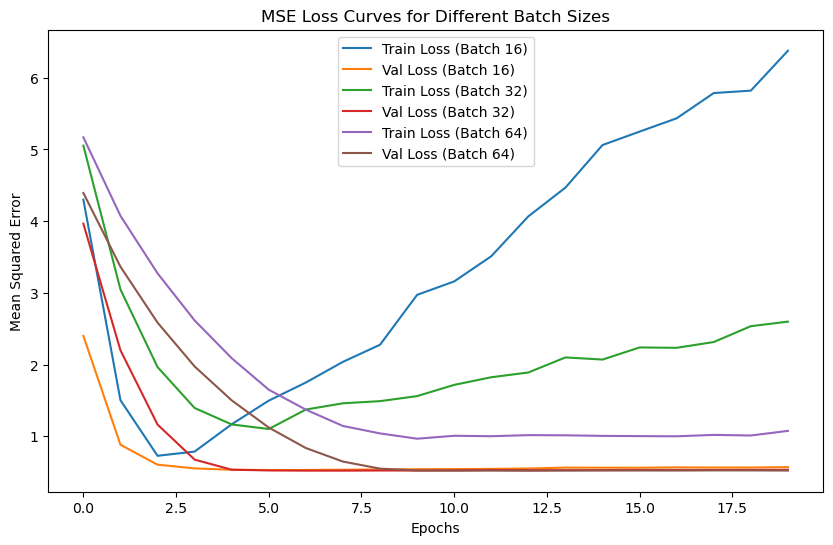

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Sample Predictions: [0.6831763 1.7804854 2.806605  2.800354  2.6248057]


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Linear model
    ])
    return model

batch_sizes = [16, 32, 64]
histories = {}

for batch_size in batch_sizes:
    model = build_model()
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, verbose=1)
    histories[batch_size] = history

plt.figure(figsize=(10, 6))
for batch_size, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss (Batch {batch_size})')
    plt.plot(history.history['val_loss'], label=f'Val Loss (Batch {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Loss Curves for Different Batch Sizes')
plt.legend()
plt.show()

predictions = model.predict(X_test)
print("Sample Predictions:", predictions[:5].flatten())
